In [64]:
%config ZMQInteractiveShell.buffer_size = 99999999999999999999

In [65]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [66]:
import pandas as pd 
import numpy as np
import keras
import matplotlib.pyplot as plt

In [67]:
model = keras.models.load_model("./models/fashion_year.HDF5")

In [68]:
train_X=np.load('./train_X.npy')
test_X=np.load('./test_X.npy')
train_y=np.load('./train_y.npy')
test_y=np.load('./test_y.npy')

In [69]:
# 원핫 인코딩
train_y=pd.get_dummies(train_y, dtype=int)
test_y=pd.get_dummies(test_y, dtype=int)

In [89]:
train_y[:5]

,1950,1960,1970,1980,1990,2000,2010,2019
0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [7]:
model.evaluate(train_X, train_y)

375/375 [==============================] - 335s 863ms/step - loss: 0.5661 - accuracy: 0.9038


[0.5660752058029175, 0.9037500023841858]

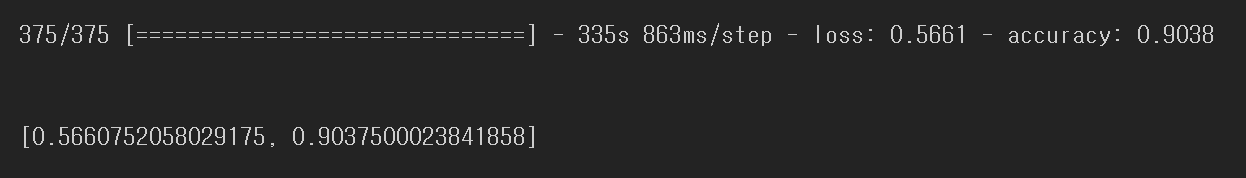

In [6]:
model.evaluate(test_X, test_y)

125/125 [==============================] - 110s 727ms/step - loss: 2.0993 - accuracy: 0.6607


[2.0993244647979736, 0.6607499718666077]

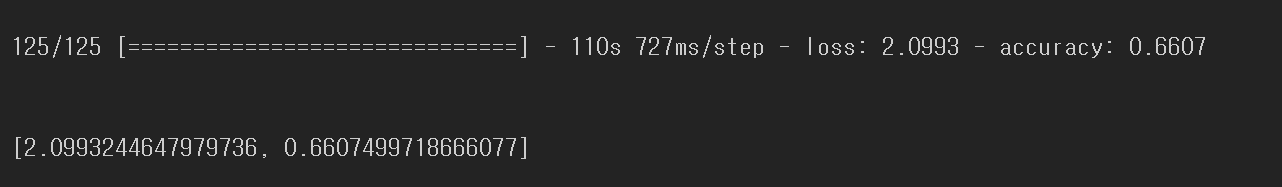

In [6]:
pred = model.predict(test_X[:10])
pred.shape

1/1 [==============================] - 1s 950ms/step


(10, 8)

In [91]:
y_labels=['1950','1960','1970','1980','1990','2000','2010','2020']

In [71]:
# test data 예측 결과
pred_result=[]
for a in pred:
    # 클래스 확인
    idx = np.argmax(a)
    pred_num = y_labels[idx]
    pred_result.append(pred_num)

In [72]:
pred_result

['1950']

In [42]:
# 예측결과 확인 함수
def result_num_pred(a):
    print(f' 예측결과 =>',pred_result[a])
    plt.imshow(test_X[a].reshape(400, 300, 3))
    plt.show()

## 새로운 파일 예측

In [87]:
file='./test_1950.jpg'
d_size=(400, 300)

def predict_year(file, d_size):

    import cv2 

    org = cv2.imread(file, cv2.IMREAD_COLOR) 
    img = cv2.resize(org, d_size)
    img = img.reshape(1,400,300,3)

    pred = model.predict(img)

    idx = np.argmax(pred)
    pred_fashion = y_labels[idx]

    print(f'예측결과 =>',pred_fashion)
    img_rgb = cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB)
    img_rgb.shape
    plt.imshow(img_rgb.reshape(300,400,3))# ,cmap='gray'
    plt.show()

In [109]:
import glob

file_path='./test_img/*'
file_list=glob.glob(file_path)
file_list

['./test_img\\test_1.jpg',
 './test_img\\test_2.jpg',
 './test_img\\test_3.jpg',
 './test_img\\test_4.jpg',
 './test_img\\test_5.jpg']

1/1 [==============================] - 0s 80ms/step
예측결과 => 1950


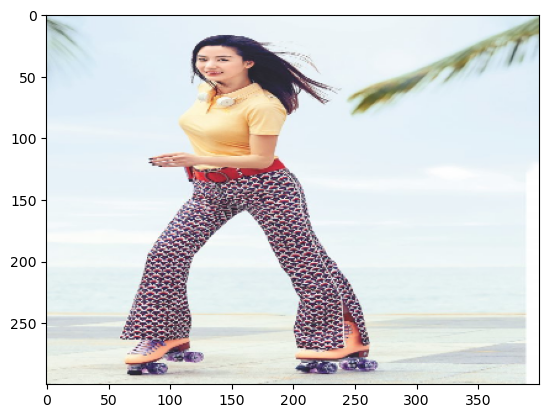

In [99]:
predict_year(file_list[0], d_size)

1/1 [==============================] - 0s 79ms/step
예측결과 => 1990


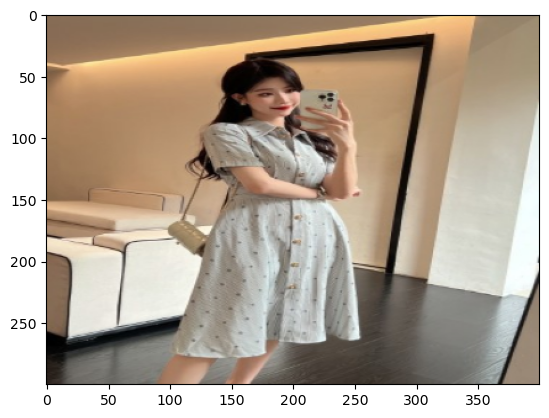

In [107]:
predict_year(file_list[1], d_size)

1/1 [==============================] - 0s 100ms/step
예측결과 => 2000


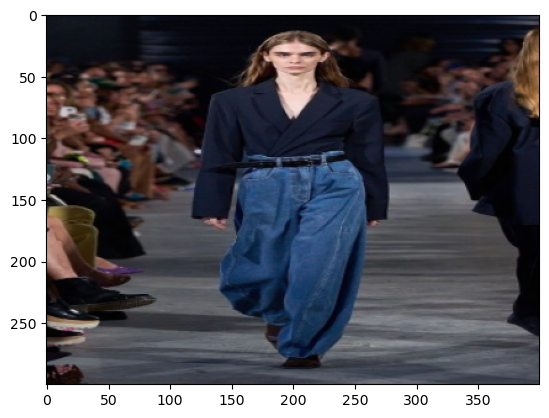

In [102]:
predict_year(file_list[2], d_size)

1/1 [==============================] - 0s 103ms/step
예측결과 => 2010


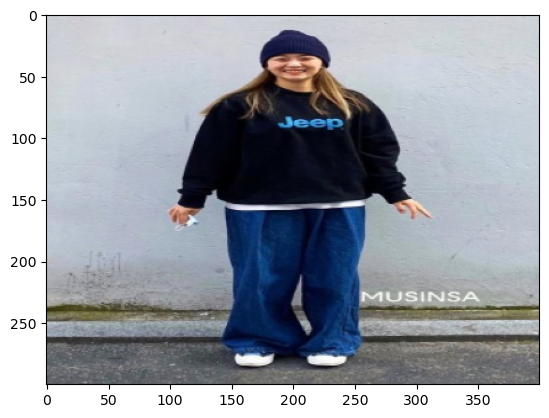

In [105]:
predict_year(file_list[3], d_size)